Simple notebook for illustrating the scipy.opitmize.curve_fit routine.

J.M. Fabritius II

circa 24/04/17


In [2]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.patches import Ellipse
%matplotlib inline

**curve_fit** is a part of the **scipy** library, under the **optimize** heading. It will require an input array of data, as well as a function it will be attempting to parameterize. Documentation is available here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

The script below will be somewhat of a redundant check on creating 'noisy' data and then using an assumed form to fit the data, with plots of the fit function and error ellipses.

In [4]:
def fit1(var, par_a, par_b):
    return par_a * var + par_b

def fit2(var, par_a, par_b):
    return par_a*(var**par_b)

Declare variables, as one does

In [16]:
N = 15
alpha = 4.
beta = 3.
xmin, xmax = 0, 100
n_alpha = 0.5

This is just some text. Blahdeeblah

In [17]:
x = np.sort(np.random.uniform(xmin, xmax,N)) #sorted array of random (uniformly) x values
nozx = x + n_alpha*np.random.normal(0,1,size=len(x)) #noisify the data
z1 = fit1(x, alpha, beta) #form 1
nozz1 = z1 + n_alpha*np.random.normal(0,1,size=len(x)) #ditto 

z2 = fit2(x, alpha, beta) #form 2
nozz2 = z2 + n_alpha*np.random.normal(0,1,size=len(x)) 

Running the actual optimization is mind numbingly simple:

**curve_fit** takes in as parameters the assumed functional form, and input data (x, f(x)). The assigned variables are an array of the 'best fit' parameters, dependent on the function data is being fit to, and a covariance matrix for those parameters.

For these example functions above, **fit1** and **fit2**, there are two free parameters. So the parameter array will have two entries. The covariance matrix (read:https://en.wikipedia.org/wiki/Covariance_matrix) contains entries for cross correlation of variables, and uncertainty in variable fit. We are only concerned, here, with the upper diagonal entries as they correspond to the fit parameters as (squared) uncertainty estimates.

In [18]:
fParameter_1, fCovariance_1 = curve_fit(fit1,nozx,nozz1)

fParameter_2, fCovariance_2 = curve_fit(fit2,nozx,nozz2)

In [19]:
print 'For a function of y = alpha*x + beta'
print 'Alpha = ', fParameter_1[0], ' +/-', fCovariance_1[0,0],', Beta = ', fParameter_1[1], ' +/- ', fCovariance_1[1,1]

print 'For a function of y = alpha*(x**beta)'
print ('Alpha = ', fParameter_2[0], ' +/-', fCovariance_2[0,0],', Beta = ', fParameter_2[1], ' +/- ', fCovariance_2[1,1])

print('Actual Alpha = ', alpha, ', Actual Beta = ', beta)


For a function of y = alpha*x + beta
Alpha =  3.97253940702  +/- 9.36764913288e-05 , Beta =  4.80483847465  +/-  0.276757413391
For a function of y = alpha*(x**beta)
('Alpha = ', 4.037676172753887, ' +/-', 0.3913188322408323, ', Beta = ', 2.9972469646014099, ' +/- ', 0.0012006682959385946)
('Actual Alpha = ', 4.0, ', Actual Beta = ', 3.0)


So as you can see, it can reasonably fit the form but some further statistical techniques will help. Let's look at an illustration of this fitting technique.

First, plots of the functional fit to these 'noisy' datapoints, with 1$\sigma$ and 2$\sigma$ fits

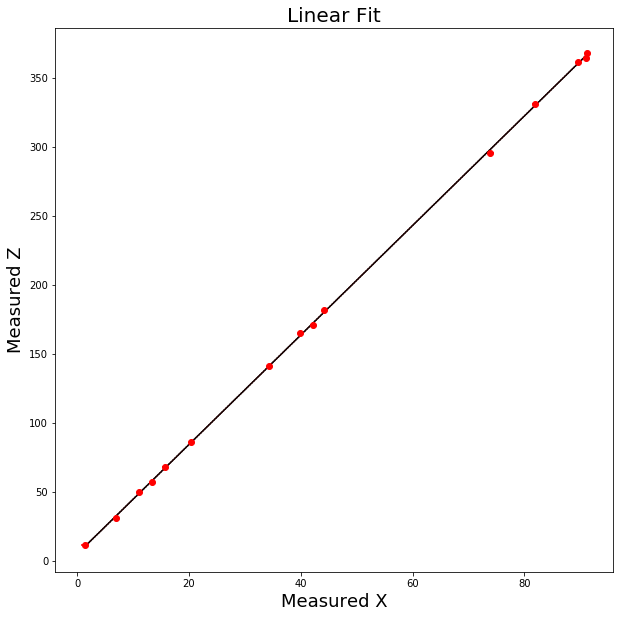

In [20]:
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(111)
ax1.set_title('Linear Fit',fontsize=20)
ax1.set_ylabel('Measured Z', fontsize=18)
ax1.set_xlabel('Measured X', fontsize=18)
ax1.errorbar(nozx, nozz1, fmt = 'ro', yerr = abs(nozz1-z1), xerr= abs(nozx-x))

sigma = [fCovariance_1[0,0],fCovariance_1[1,1]]

ax1.plot(nozx, fit1(nozx, fParameter_1[0], fParameter_1[1]), color= 'r', linewidth=1.0)
ax1.plot(nozx, fit1(nozx, fParameter_1[0]+sigma[0], fParameter_1[1]-sigma[1]), color='k', linestyle='-',linewidth=0.75)
ax1.plot(nozx, fit1(nozx, fParameter_1[0]-sigma[0], fParameter_1[1]+sigma[1]), color='k', linestyle='-',linewidth=0.75)
ax1.plot(nozx, fit1(nozx, fParameter_1[0]+2*sigma[0], fParameter_1[1]-2*sigma[1]), color='k', linestyle='--',linewidth=0.5)
ax1.plot(nozx, fit1(nozx, fParameter_1[0]-2*sigma[0], fParameter_1[1]+2*sigma[1]), color='k', linestyle='--',linewidth=0.5)

plt.show()

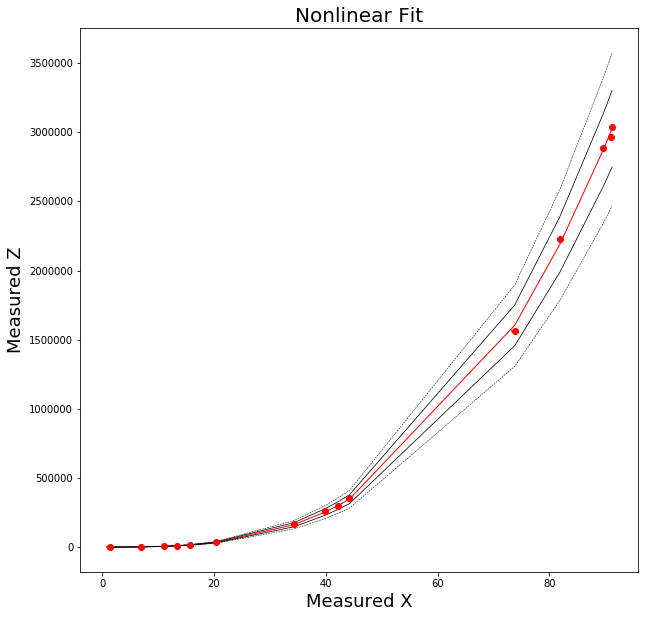

In [21]:
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(111)
ax1.set_title('Nonlinear Fit',fontsize=20)
ax1.set_ylabel('Measured Z', fontsize=18)
ax1.set_xlabel('Measured X', fontsize=18)
ax1.errorbar(nozx, nozz2, fmt = 'ro', yerr = abs(nozz2-z2), xerr= abs(nozx-x))

sigma = [fCovariance_2[0,0],fCovariance_2[1,1]]

ax1.plot(nozx, fit2(nozx, fParameter_2[0], fParameter_2[1]), color= 'r', linewidth=1.0)
ax1.plot(nozx, fit2(nozx, fParameter_2[0]+sigma[0], fParameter_2[1]-sigma[1]), color='k', linestyle='-',linewidth=0.75)
ax1.plot(nozx, fit2(nozx, fParameter_2[0]-sigma[0], fParameter_2[1]+sigma[1]), color='k', linestyle='-',linewidth=0.75)
ax1.plot(nozx, fit2(nozx, fParameter_2[0]+2*sigma[0], fParameter_2[1]-2*sigma[1]), color='k', linestyle='--',linewidth=0.5)
ax1.plot(nozx, fit2(nozx, fParameter_2[0]-2*sigma[0], fParameter_2[1]+2*sigma[1]), color='k', linestyle='--',linewidth=0.5)

plt.show()

And now a plot of the Linear Error Ellipse, with contours at 1$\sigma$ and 2$\sigma$

1
2


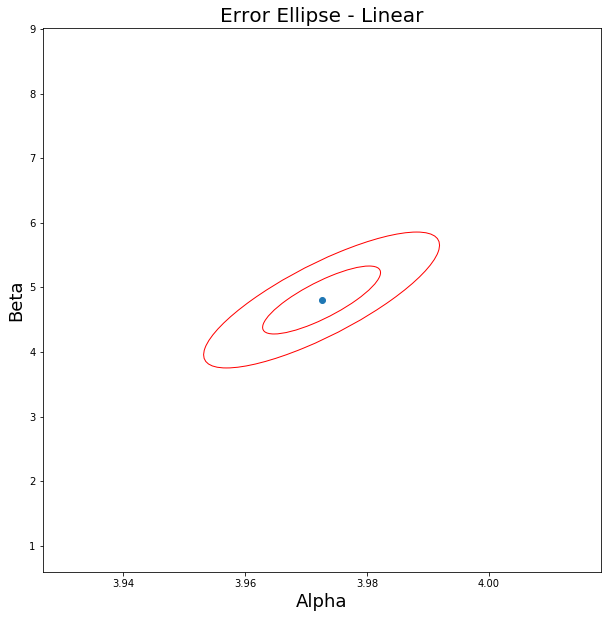

In [23]:
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(111)
L,V = np.linalg.eig(fCovariance_1)
L = np.sqrt(L)

for _ in range(1,3):
    print(_)
    ang = np.rad2deg(np.arccos(V[0,0]))
    wid = 2*L[0]*_
    hgt = 2*L[1]*_
    ell = Ellipse(xy =(fParameter_1[0],fParameter_1[1]), width=wid, height=hgt, angle=ang)
    ell.set_facecolor('none')
    ell.set_edgecolor('r')
    ax1.add_artist(ell)

ax1.scatter(fParameter_1[0],fParameter_1[1])
ax1.set_title('Error Ellipse - Linear', fontsize=20)
ax1.set_xlabel('Alpha', fontsize=18)
ax1.set_ylabel('Beta', fontsize=18)
ax1.set_xlim(fParameter_1[0]+wid*2*V[0,0],fParameter_1[0]-wid*2*V[0,0])
ax1.set_ylim(fParameter_1[1]+hgt*2*V[1,1],fParameter_1[1]-hgt*2*V[1,1])
plt.show()


 Unfortunately, error contours are not so simple for non-linear fits (this is where the cross correlation values come into play from the covariance matrix) so a much more rigorous technique would need to be utilized

In [44]:
ell.get_edgecolor()

(0.0, 0.0, 0.0, 0.0)